# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [104]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

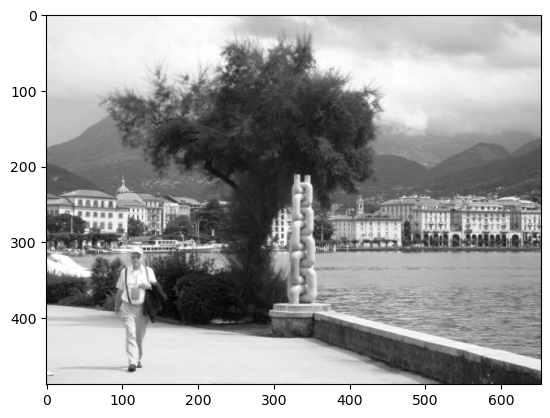

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [78]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла] Нарисуйте график диагональных элементов матрицы $\Sigma$:**

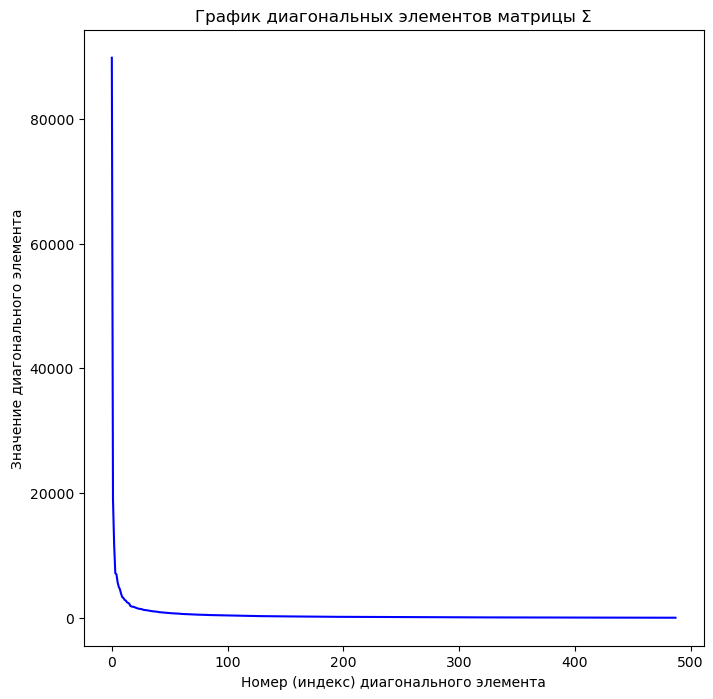

In [106]:
plt.figure(figsize = (8,8))
        
nums_range = list(range(len(S)))
plt.title("График диагональных элементов матрицы Σ")
plt.plot(nums_range, S, color='b')

plt.xlabel("Номер (индекс) диагонального элемента")
plt.ylabel("Значение диагонального элемента")

plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла] Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.**

Всего сингулярных значений у данной матрицы:  488


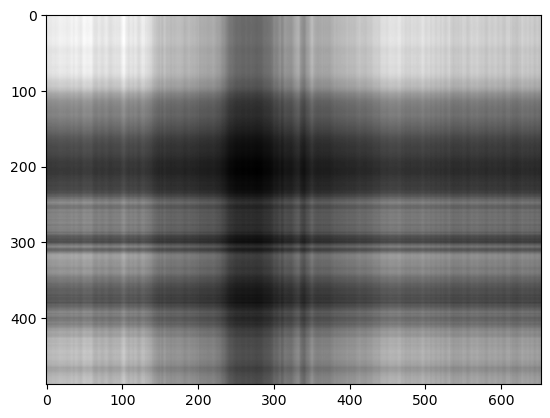

In [107]:
S=np.diag(S) #Превратим массив в диагональную матрицу
s_1=S[0][0] #Берем первое сингулярное значение
u_1=U[:,0:1] #Берем первый столбец матрицы U
vT_1=VT[0:1,:] #Берем первый столбец матрицы V (т.е. первую строку матрицы V^T)
first_comp=s_1*(u_1@vT_1) #Считаем первую компоненту по формуле

#Визуализируем первую компоненту (как матрицу, по аналогии с изначальным изображением)
imgplot = plt.imshow(first_comp, cmap='gray')

print("Всего сингулярных значений у данной матрицы: ", len(S))

### Ответ

Да, примерно этого и следовало ожидать.

Как мы знаем, сингулярные значения в матрице Σ не возрастают, т.е. чем раньше (левее) сингулярное число в матрице, тем оно больше. Из этого следует, что первым компонентам в низкоранговом разложении соответствуют наибольшие сингулярные значения. Значит, первые компоненты несут больше всего информации об исходной матрице, их вклад в воссоздание матрицы (в данном случае - в восстановление изображения) максимален. И данный пример это подтверждает: здесь первая компонента передала основные области насыщенности цвета на изначальном фото - дерево и скульптуру на переднем плане, здания на заднем плане.

Картинка получилась очень размытой - настолько, что не видя изначальное фото сложно догадаться, что здесь изображено. Но это тоже ожидаемо: мы пока визуализировали только первую из 488 компонент. 

**3. [0.5 балла] Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.**

### Ответ

Заметим, что если мы: 
- возьмем мартцу $U$ целиком; 
- массив $S$ превратим в диагональную матрицу и из него возьмем столбцы с i-того по j-тый; 
- из матрицы $V^T$ возьмем строки с i-той по j-тую (а это транспонированные столбцы матрицы $V$, с i-того по j-тый) 
- и полученные матрицы перемножим, 

то мы как раз получим суммы компонент с i-той по j-тую:

$(u_{1}, u_{2}, ..., u_{m})*diag(\sigma_{i}, \sigma_{i+1}, ..., \sigma_{j})*(v_{i}^T, v_{i+1}^T, ..., v_{j})^T = (\sigma_{i}u_{i}, \sigma_{i+1}u_{i+1}, ..., \sigma_{j}u_{j})*(v_{i}^T, v_{i+1}^T, ..., v_{j})^T = \sigma_{i}u_{i}v_{i}^T, \sigma_{i+1}u_{i+1}v_{i+1}^T, ..., \sigma_{j}u_{j}v_{j}^T$

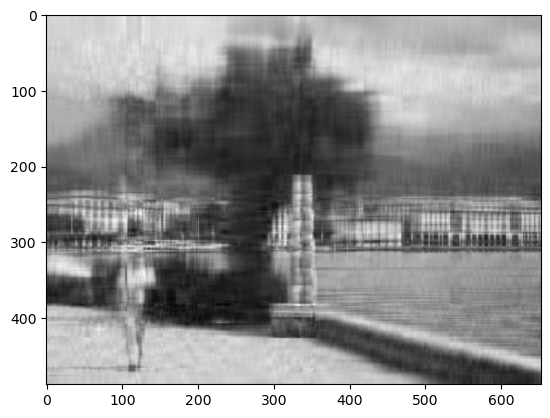

In [108]:
#Визуализируем суммы компонент ранга 1 с первой по двадцатую
temp1=S[:,0:20] #Берем первые 20 столбцов в матрице S
temp2=VT[0:20,:] #Берем первые 20 строк в матрице V^T

one_twenty_comp = U@temp1@temp2

imgplot = plt.imshow(one_twenty_comp, cmap='gray')    

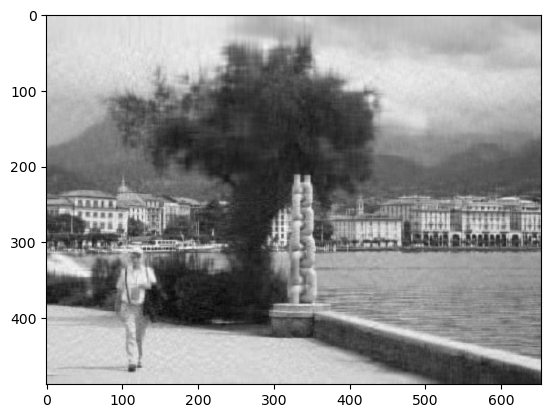

In [109]:
#Визуализируем суммы компонент ранга 1 с первой по пятидесятую
temp3=S[:,0:50] #Берем первые 50 столбцов в матрице S
temp4=VT[0:50,:] #Берем первые 50 строк в матрице V^T

one_fifty_comp = U@temp3@temp4

imgplot = plt.imshow(one_fifty_comp, cmap='gray') 

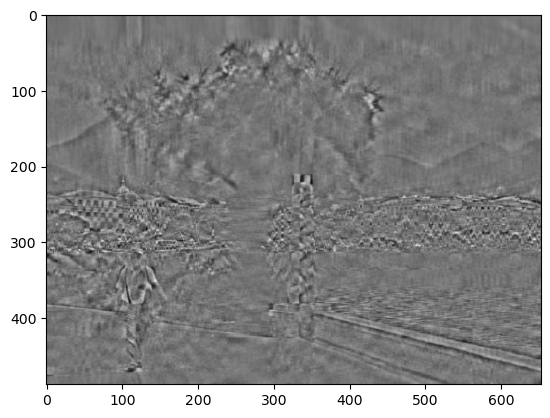

In [110]:
#Визуализируем суммы компонент ранга 1 с двадцатой по сотую
temp5=S[:,19:100] #Берем столбцы 20-100 в матрице S
temp6=VT[19:100,:] #Берем строки 20-100 в матрице V^T

twenty_hundred_comp = U@temp5@temp6

imgplot = plt.imshow(twenty_hundred_comp, cmap='gray') 

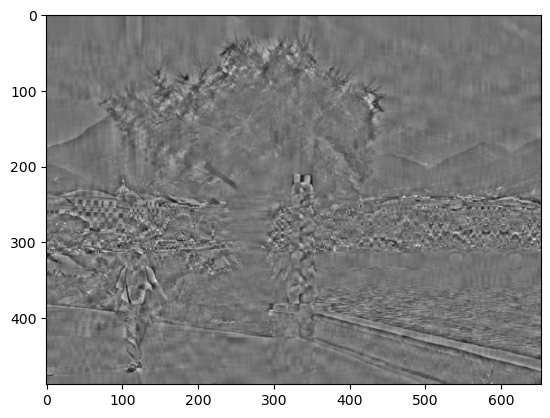

In [111]:
#Визуализируем суммы компонент ранга 1 с двадцатой по последнюю
temp7=S[:,19:] #Берем столбцы 20-последний в матрице S
temp8=VT[19:,:] #Берем строки 20-последний в матрице V^T

twenty_last_comp = U@temp7@temp8

imgplot = plt.imshow(twenty_last_comp, cmap='gray') 

### Ответ

1) Заметим, что каждая последующая компонента привносит в изображение больше деталей. Чем больше компонент, начиная с первой, мы суммируем, тем четче становится изображение, т.е. тем ближе наша матрица к изначальной. При этом каждая следующая компонента соответствует все меньшему сингулярному значению, поэтому добавляет все меньше деталей, вносит все меньший вклад в близость нашей матрицы к изначальной. Так, сумма компонент 1-20 приблизила изображение "с нуля" до относительно понятной и разборчивой картинки, в то время как сумма дополнительных 30 матриц только добавила немного четкости.

2) Поскольку каждая следующая матрица только "добавляет детали", если мы рассматриваем некоторую сумму компонент БЕЗ нескольких первых штук, то мы теряем основные числа в матрице, т.е. теряем смысл картинки. Так, основные области насыщенности цвета в нашем случае передаются суммой первых 20 матриц, а суммы компонент 20-100 или 20-488 сами по себе не передают основную композицию или даже очертания всех предметов и людей на фото. Они только добавляют четкости сумме компонент 1-20. Значит, каждая слудующая компонента, рассмотренная индивидуально, будет все менее и менее полезна для смотрящего.

**4. [0.35 балла] Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.**

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

### Ответ

Я считаю, что суммы компонент с 1 по 100 достаточно для хорошего восстановления исходного изображения. Дело в том, что 100-ая компонента - это примерный рубеж, до которого компоненты относительно отличны от нулевой матрицы (следовательно, при суммировании привносят в изображение достаточно новой информации - детали, четкость и т.п.), но начиная с которого компоненты уже относительно не отличаются от нулевой матрицы (значит, их прибавление к имеющейся сумме компонент не даст нам ничего значительно нового в изображении, но займет память при хранении матриц).

Докажем эту оценку: начертим график, который найдет доли норм Фробениуса относительно норимы Фробениуса первой компоненты для каждой компоненты $S$ с 1 по 488 (т.е. для каждой матрицы с 1 по 488 вычислим: $\frac{||S_{k}-0||}{||S_{1}-0||}=\frac{||\sqrt{\Sigma_{i}\Sigma_{j} (s_k)_{ij}^2}||}{||\sqrt{\Sigma_{i}\Sigma_{j} (s_1)_{ij}^2}||}$). 

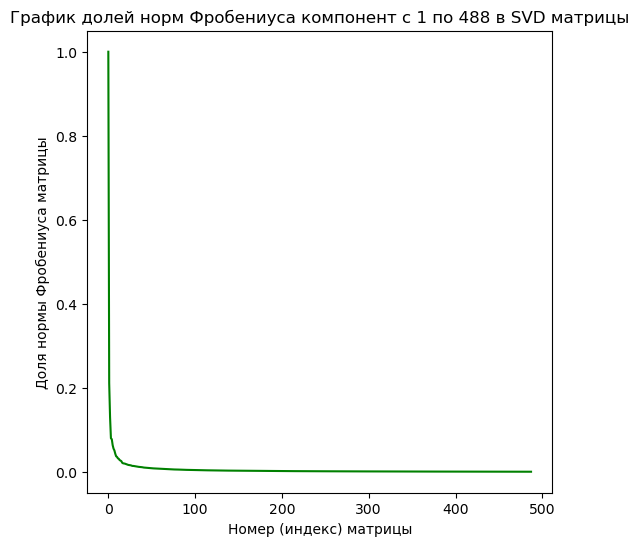

In [117]:
U, S, VT = svd(img, full_matrices=False)
matrixes=[j for j in range(len(S))]
frobenius=[]

#Найдем норму Фробениуса у первой компоненты (она должна быть наибольшей)
maxx_temp=S[0]*(U[:,0:1]@VT[0:1,:])
maxx=np.linalg.norm(maxx_temp, 'fro')

for i in range(len(S)):
    s_i=S[i] #Берем i-тое сингулярное значение
    u_i=U[:,i:i+1] #Берем i-тый столбец матрицы U
    vT_i=VT[i:i+1,:] #Берем i-тый столбец матрицы V (т.е. i-тую строку матрицы V^T)
    temp=s_i*(u_i@vT_i)
    frobenius.append(np.linalg.norm(temp, 'fro')/maxx)

plt.figure(figsize = (6,6))
plt.title("График долей норм Фробениуса компонент c 1 по 488 в SVD матрицы")
plt.plot(matrixes, frobenius, color='g')

plt.xlabel("Номер (индекс) матрицы")
plt.ylabel("Доля нормы Фробениуса матрицы")

plt.show()    

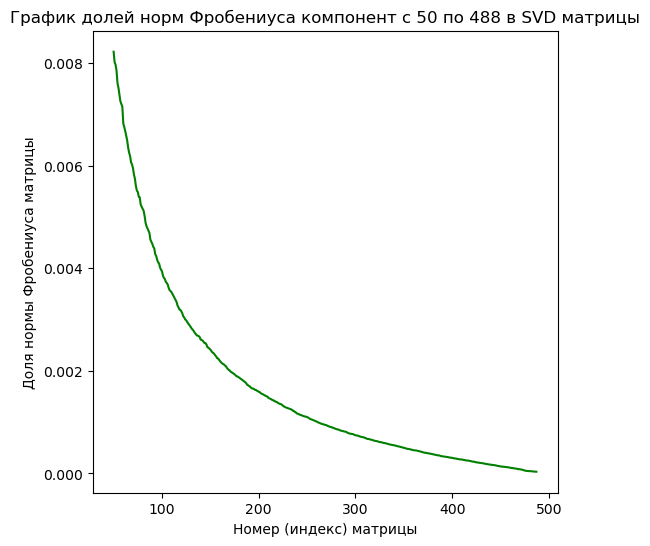

In [118]:
plt.figure(figsize = (6,6))
plt.title("График долей норм Фробениуса компонент c 50 по 488 в SVD матрицы")
plt.plot(matrixes[50:], frobenius[50:], color='g')

plt.xlabel("Номер (индекс) матрицы")
plt.ylabel("Доля нормы Фробениуса матрицы")

plt.show()    

### Ответ

Мы видим, что начиная с 100 компоненты доли норм Фробениуса компонет составляют не более 0,004 от нормы Фробениуса первой компоненты, из чего следует вывод, что компонентами со 101 по 488 можно пренебречь в целях экономии памяти, т.к. их индивидуальный вклад в качество изображения крайне мал.

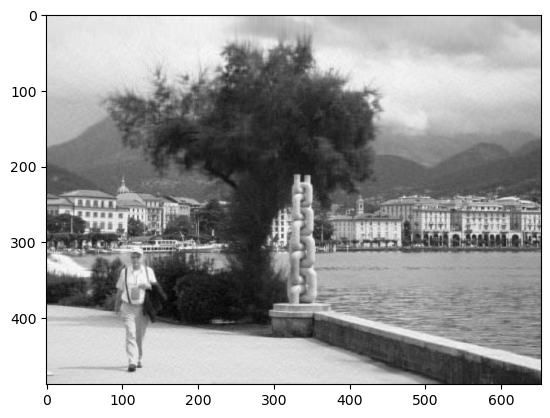

In [119]:
#Визуализируем суммы компонент ранга 1 с первой по сотую
S=np.diag(S)
temp9=S[:,0:100] #Берем первые 100 столбцов в матрице S
temp10=VT[0:100,:] #Берем первые 100 строк в матрице V^T

one_hundred_comp = U@temp9@temp10

imgplot = plt.imshow(one_hundred_comp, cmap='gray')   

**5. [0.15 балла] Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?**

In [121]:
m=len(img)
n=len(img[0])
print("m = ", m, " - высота исходной матрицы")
print("n = ", n, " - ширина исходной матрицы")

m =  488  - высота исходной матрицы
n =  653  - ширина исходной матрицы


### Ответ

Изначально мы хранили матрицу А целиком, и затраты памяти составляли $m\times n = 488\times 653 = 318664$

Теперь нам потребуются первые 100 компонент, состоящие из:
- 100 сингулярных значений
- 100 векторов $u_i$ высоты 488
- 100 векторов $v_i$ высоты 653

Итого: $100+100*488+100*653=114200$, тогда: $\frac{318664}{114200}\approx 2,7904$ - во столько раз меньше памяти нам понадобится.


При этом мы знаем, что если у нас имеется матрица $A$ размера $m\times n$, ее усеченное сингулярное разложение таково: $A = U\Sigma V^T,$ где $U$ и $V$ — матрицы размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$ и в этой матрице $r$ положительных чисел на диагонали, то она раскладывается в сумму одноранговых матриц:

$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + \ldots + u_r\sigma_{r}v_r^T$

Тогда затраты памяти на хранение всех компонент матрицы составят: длина массива сингулярных значений (только положительных) + первые r столбцов длины m матрицы U + первые r столбцов длины n матрицы V  = $r + r\times m + r\times n = r\times (1+m+n) = $[в данном случае $r=m$] $= 488 \times (1+488+653)=557296 \implies \frac{557296}{318664}\approx 1,74889$ - во столько раз больше памяти займет хранение компонент по сравнению с хранением всего изображения.

**6. [0.25 балла] Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.**

In [126]:
#Здесь мы не используем теоретические формулы, а считаем с помощью специальных функций, 
#сколько реально места в памяти компьютера занимает матрица и ее компоненты

import sys
print("Затраты памяти на хранение исходной матрицы равны: ", sys.getsizeof(img))
print("Затраты памяти на хранение компонент сингулярного разложения матрицы равны: ", sys.getsizeof(U)+sys.getsizeof(S)+sys.getsizeof(VT))

Затраты памяти на хранение исходной матрицы равны:  2549432
Затраты памяти на хранение компонент сингулярного разложения матрицы равны:  6359976


### Ответ

Следовательно, на хранение компонент сингулярного разложения матрицы потребуется в $\frac{6359976}{2549432}\approx 2,49466$ раз больше, чем для хранения исходной матрицы. Данный результат превышает теоретический результат, полученный нами при подсчете затрат памяти по формулам. Вероятно, так происходит из-за неочевидных оптимизаций хранения матриц в памяти компьютера, которые не вписываются в наши формулы.

В предыдущем пункте у нас получилось уменьшить объем требуемой памяти для хранения изображения, но здесь он вырос. Из этого можно сделать два вывода: чтобы реально уменьшить объем памяти для хранения картинки, нужно:

- либо хранить не все компоненты, а только самые "значимые" (мы, например, взяли только первые 100 в прошлом пункте)

- либо чтобы одно из измерений матрицы было довольно маленьким по сравнению с другим (иначе $m\times n$ примерно равно или даже меньше, чем $r\times (1+m+n))$

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла] Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 =^{(1)} \mathrm{max}_{w}\frac{|Xw|}{|w|} =^{(2)} \mathrm{max}_{|w| = 1}~|Xw| =^{(3)} \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$**

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

### Ответ

1) Докажем равенство $(2)$, тогда из него и равенства $\sigma_1 = \max_{|v|=1}{|Xv|}$ будет следовать равенство $(1)$

Пусть $a=|w|$ и обозначим $v=\frac{w}{|w|}=\frac{w}{a} \implies |v|=1; w=a*v \implies max_{w}{\frac{|Xw|}{|w|}}=max_{|v|=1}{\frac{|aX*v|}{|a*v|}}=max_{|v|=1}{\frac{|a|*|X*v|}{|a|*|v|}} = max_{|v|=1}{\frac{|a|*|X*v|}{|a|}}=max_{|v|=1}{|X*v|}$


2) Мы знаем, что в матрице $V$ по столбцам стоят ортонормированные векторы из $\mathbb{R^n}$, причем их n штук и они линейно независимы. Значит, столбцы матрицы $V$ образуют ортонормированный базис в $\mathbb{R^n}$. 

Значит, любой вектор $w\in \mathbb{R^n}$ единственным образом выражается через векторы $v_{1}, ... , v_{n}$. Кроме того, в силу того, что $v_{1}, ..., v_{n}$ - ортогональный базис, имеем: $(v_{i}, v_{j})=0, i\neq j; (v_{i}, v_{i})=1$ 

Пусть $w=a_{1}v_{1}+...+a_{n}v_{n}, |w|=1 \implies |w|^2=(w, w)=((a_{1}v_{1}+...+a_{n}v_{n}),(a_{1}v_{1}+...+a_{n}v_{n}))=a_{1}^2(v_1, v_1)+...+a_n^2(v_n, v_n) = a_1^2+...+a_n^2=1$

При этом заметим, что $\forall i=1, ..., n: \quad (w, v_i) = (a_{1}v_{1}+...+a_{n}v_{n}, v_i)=a_i(v_i, v_i)=a_i $

Знаем, что $v_1, ..., v_n$ - собственные векторы матрицы $X^TX$, соответствующие собственным значениям $\sigma_1^2, ..., \sigma_n^2 \implies X^TXv_1 = \sigma_1^2v_1, ..., X^TXv_n = \sigma_n^2v_n \implies$

Также знаем, что $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_n \geq 0$

Теперь рассмотрим произведение: $Xw=X(a_{1}v_{1}+...+a_{n}v_{n}) = a_1Xv_{1}+...+a_nXv_{n} \implies |Xw|^2=(Xw, Xw)= (Xw)^T(Xw) = w^TX^TXw = a_1w^T(X^TXv_{1})+...+a_nw^T(X^TXv_{n}) = a_1w^T\sigma_1^2 v_1+...+a_nw^T\sigma_n^2 v_n =a_1\sigma_1^2 (w^T*v_1)+...+a_n\sigma_n^2 (w^T*v_n) = a_1\sigma_1^2 (w, v_1)+...+a_n\sigma_n^2 (w, v_n) = a_1^2\sigma_1^2+...+a_n^2\sigma_n^2 \leq a_1^2\sigma_1^2+...+a_n^2\sigma_1^2 = \sigma_1^2*(a_1^2+...a_n^2)=\sigma_1^2$

Итак, получаем, что $\sigma_1^2 = \max_{|w|=1}{|Xw|^2}$. Поскольку $|Xw|, \sigma_1$ - неотрицательные величины, равенство без квадратов тоже верно: $\sigma_1 = \max_{|w|=1}{|Xw|}$

При этом отметим, что равенство достигается: например, если $w=v_1$, тогда $a_1=1, a_i=0 \quad \forall i=2, ...n \implies |Xw|^2= w^TX^TXw = a_1w^T(X^TXv_{1})=a_1\sigma_1^2 w^T v_1 = a_1^2\sigma_1^2=\sigma_1^2$

3) По аналогии с объяснением во 2 пункте, столбцы матрицы $U$ $u_1, ..., u_m$ образуют ортонормированный бизис в $\mathbb{R^m}$.

Пусть теперь $v=a_1v_1+...+a_nv_n, |v|=1 \implies |v|^2=a_1^2+...+a_n^2=1$

Тогда помним, что $\forall j=1, ..., n: \quad (v_j, v)=a_j$

Аналогично, пусть $u=b_1u_1+...b_mu_m, |u|=1 \implies |u|^2=b_1^2+...+b_m^2=1$

При этом $\forall i=1, ..., m: \quad (u, u_i) = b_1(u_1, u_i)+...b_m(u_m, u_i) = b_i(u_i, u_i)=b_i$

Рассмотрим $u^TXv = u^TU\Sigma V^T v \implies$

$u^TU = u^T(u_1, u_2, ..., u_m) = ((u, u_1), (u, u_2), ..., (u, u_m))=(b_1, b_2, ..., b_m)$

$V^Tv = (v_1^T, v_2^T, ..., v_n^T)^Tv = ((v_1, v), (v_2, v), ..., (v_n, v))^T=(a_1, a_2, ..., a_n)^T$

Без ограничения общности, пусть $m\leq n \implies u^TXv = u^TU\Sigma V^T v = (b_1, b_2, ..., b_m)\Sigma *(a_1, a_2, ..., a_n)^T = (b_1\sigma_1, ..., b_m\sigma_m, 0...)*(a_1, a_2, ..., a_n)^T = \sigma_1 a_1 b_1 + ... + \sigma_m a_m b_m \leq (b_1^2+...+b_n^2)*\sigma_1 = \sigma_1$

Тогда действительно верно равенство: $\sigma_1 = \max_{|u|=|v|=1}{|u^TXv|}$

**2. [0.75 балла] Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.** 

### Ответ

1) Распишем данную матрицу поподробнее:
$$A = \begin{pmatrix}
sin(0)*cos(0) & sin(0)*cos(1) & sin(0)*cos(2) & \ldots & sin(0)*cos(n-1)\\
sin(1)*cos(0) & sin(1)*cos(1) & sin(1)*cos(2) & \ldots & sin(1)*cos(n-1)\\
\vdots & & \vdots\\
sin(n-1)*cos(0) & sin(n-1)*cos(1) & sin(n-1)*cos(2) & \ldots & sin(n-1)*cos(n-1)\\
\end{pmatrix}$$

Заметим, что такая матрица представима в виде произведения столбца на строку: 

$$A = \begin{pmatrix}
sin(0)\\
sin(1)\\
\vdots\\
sin(n-1)\\
\end{pmatrix} * (cos(0) \quad cos(1) \quad \ldots \quad cos(n-1)) = u*v^T$$

Мы знаем, что таким свойством обладает только нулевая матрица и матрица ранга 1. При этом $n>1$, поэтому высота столбцов миниму 2 и данная матрица точно не нулевая. Следовательно, матрица а - одноранговая матрица, т.е. $r=rkA=1$.

2) Получается, что в сингулярном разложении у данной матрицы будет единственное сингулярное значение $\sigma_1$, т.е. $Σ=(\sigma_1)$ - матрица размера $1\times 1$; при этом A - матрица размера $n\times n \implies U, V -$ матрицы размера $n\times 1$, т.е. просто столбцы. 

Однако мы знаем, что матрицы U, V в сингулярном разложении - матрицы с ортонормированными столбцами. Следовательно, чтобы получить матрицы U, V нам остается просто поделить векторы u, v на их длины: $U=\frac{u}{|u|}, V=\frac{v}{|v|}$. 

Тогда искомая матрица $Σ$, она же единственное в разложении сингулярное число $\sigma_1$, равна: $\sigma_1={|u|*|v|}$

3) Итак, подставляя имеющиеся значения, получаем следующее:
$$U = \frac{1}{\sqrt{(sin(0))^2+(sin(1))^2+(sin(2))^2+...+(sin(n-1))^2}}*\begin{pmatrix}
sin(0)\\
sin(1)\\
\vdots\\
sin(n-1)\\
\end{pmatrix}$$

$$V = \frac{1}{\sqrt{(cos(0))^2+(cos(1))^2+(cos(2))^2+...+(cos(n-1))^2}}*\begin{pmatrix}
cos(0)\\
cos(1)\\
\vdots\\
cos(n-1)\\
\end{pmatrix}$$

$Σ=\sigma_1 = \sqrt{(sin(0))^2+(sin(1))^2+(sin(2))^2+...+(sin(n-1))^2} * \sqrt{(cos(0))^2+(cos(1))^2+(cos(2))^2+...+(cos(n-1))^2}$

**3. [0.5 балла] Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.**

### Ответ

1) Заметим, что: $A=U\Sigma V^T = \sigma_1u_1v_1^T + \sigma_2u_2v_2^T + ... + \sigma_ru_rv_r^T \implies$

$\forall x\in \mathbb{R}^n: \quad Ax = (\sigma_1u_1v_1^T + \sigma_2u_2v_2^T + ... + \sigma_ru_rv_r^T)*x = \sigma_1u_1v_1^Tx + \sigma_2u_2v_2^Tx + ... + \sigma_ru_rv_r^Tx$

При этом $v_i^T$ - это строка длины n, a $x$ - это столбец высоты n. Значит, $\forall i=1...r \quad v_i^Tx$ - это скаляр.

Переобозначим: $\forall i=1...r \quad \sigma_iv_i^Tx = \lambda_i, \lambda_i \in \mathbb{R} \implies Ax=\lambda_1u_1 + \lambda_2u_2 + ... + \lambda_ru_r \implies$, где $Ax$ - это координаты $\mathcal{A}(x)$. 

Значит, координаты образа любого вектора выражаютcя как линейная комбинация векторов $u_1, ..., u_r \implies \text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, ч.т.д.

2) $\forall x\in \mathbb{R}^n: \quad Ax = \sigma_1u_1v_1^Tx + \sigma_2u_2v_2^Tx + ... + \sigma_ru_rv_r^Tx (*)$

При этом по условию в столбцах матрицы $V$ записаны ортонормированные векторы, т.е. они автоматически линейно независимы между собой. При этом их $n$ штук, где $n$ - размерность пространства $\mathbb{R}^n$. Значит, столбцы матрицы $V$ образуют ортонормированный базис в $\mathbb{R}^n$.

Значит, $\forall 0 \leq i, j \leq n: \quad (v_i, v_j) = 0$, если $i\neq j$ и $(v_i, v_i) = 1$.

Кроме того, каждый вектор в $\mathbb{R}^n$ единственным образом выражается как линейная комбинация:
- либо только векторов $v_{r+1}, ..., v_n$ (группа 1)
- либо только векторов $v_1, ..., v_r$ (группа 2)
- либо векторов из обеих групп (группа 3)

Докажем, что $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$ "подстановкой в лоб": 

а) Если мы вместо х подставим вектор из группы 1 в формулу $(*)$, то все выражение станет равно 0, поскольку все скалярные произведения "занулятся": 

$x=a_{r+1}v_{r+1} + a_{r+2}v_{r+2} + ... + a_{n}v_{n}, \quad x\neq(0, ..., 0)^T$
$Ax = \sigma_1u_1v_1^T(a_{r+1}v_{r+1} + a_{r+2}v_{r+2} + ... + a_{n}v_{n}) + ... + \sigma_ru_rv_r^T(a_{r+1}v_{r+1} + a_{r+2}v_{r+2} + ... + a_{n}v_{n}) = (a_{r+1}\sigma_1u_1(v_1, v_{r+1}) + ... + a_{n}\sigma_1u_1(v_1, v_{n})) + ... + (a_{r+1}\sigma_ru_r(v_r, v_{r+1}) + ... + a_{n}\sigma_ru_r(v_r, v_{n})) = 0$

Значит, любой вектор из группы 1 принадлежит ядру данного линейного отображения.

2) Если мы вместо х подставим вектор из группы 2 в формулу $(*)$, то выражение не обнулится: 

$x=a_{1}v_{1} + a_{2}v_{2} + ... + a_{r}v_{r}, \quad x\neq(0, ..., 0)^T$
$Ax = \sigma_1u_1v_1^T(a_{1}v_{1} + a_{2}v_{2} + ... + a_{r}v_{r}) + ... + \sigma_ru_rv_r^T(a_{1}v_{1} + a_{2}v_{2} + ... + a_{r}v_{r}) = (a_{1}\sigma_1u_1(v_1, v_{1}) + ... + a_{r}\sigma_1u_1(v_1, v_{r})) + ... + (a_{1}\sigma_ru_r(v_r, v_{1}) + ... + a_{r}\sigma_ru_r(v_r, v_{r})) = a_1\sigma_1 u_1(v_1, v_1) + a_2\sigma_2 u_2(v_2, v_2) + ... a_r\sigma_r u_r(v_r, v_r) = a_1\sigma_1 u_1 + a_2\sigma_2 u_2 + ... a_r\sigma_r u_r$

При этом $a_i, \sigma_i$ - это скаляры и $(a_1, ..., a_r)\neq (0, ..., 0); (\sigma_1, ..., \sigma_r)\neq (0, ..., 0);$, т.е. мы получили линейную комбинацию базисных векторов c ненулевыми коэффициентами - она не может быть равной нулю.

Значит, никакой вектор из группы 2 не принадлежит ядру данного линейного отображения.

3) Если мы вместо х подставим вектор из группы 3 в формулу $(*)$, то выражение не обнулится по аналогии с вектором из группы 2:
скалярные произведения $(v_i, v_j), i\neq j$ занулятся, но $\forall i=1...r \quad (v_i, v_i)$ останутся. В результате мы вновь получим выражение вида: 

$Ax=a_1\sigma_1 u_1 + a_2\sigma_2 u_2 + ... a_n\sigma_n u_r$, где $(a_1, ..., a_r)\neq (0, ..., 0); (\sigma_1, ..., \sigma_r)\neq (0, ..., 0);$, т.е. мы опять получили линейную комбинацию базисных векторов c ненулевыми коэффициентами - она не может быть равной нулю.

Значит, никакой вектор из группы 3 не принадлежит ядру данного линейного отображения.

Итак, мы выяснили, что ядру могут принадлежать векторы из группы 1 и только они. Значит, $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$, ч.т.д.

**4. [0.75 балла] Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.**

### Ответ

1) Обозначим $A^TA=B$. Заметим, что, $B$ - это матрица Грама (квадратная, порядка m) для системы столбцов матрицы А. Поскольку столбцы матрицы А линейно независимы, $det(B)>0$ и матрица $B$ обратима. 

Тогда и $B^T$ обратима, причем дополнительно выполняется: $(B^{-1})^T = (B^T)^{-1}$

Также, поскольку B - матрица Грама, она симметрична, т.е. $B^T=B$

2) Рассмотрим произведение $P^TP$: $P^TP = (A(A^T A)^{-1} A^T)^T(A(A^T A)^{-1} A^T) = (AB^{-1} A^T)^T(AB^{-1} A^T) = A(B^{-1})^TA^TAB^{-1}A^T = A(B^{-1})^TBB^{-1}A^T = A(B^{-1})^TA^T = A(B^T)^{-1}A^T = AB^{-1}A^T = A(A^TA)^{-1}A^T = P$

Отсюда получаем равенство: $P^TP=P \implies (P^T-E)*P=0$.

Заметим, что $P$ - не нулевая матрица:
- $A$ - не нулевая матрица, т.к. в ней столбцы линейно независимы; 
- значит, и $A^T$ - не нулевая матрица; 
- $det(A^TA)>0 \implies det((A^TA)^{-1}) = \frac{1}{det(A^TA)>0} >0 \implies $ после обращения тоже не может получиться нулевая матрица, т.к. ее определитель равен нулю

Значит, $P^T - E = 0 \implies P^T=E \implies P=E$

3) Вычислим размеры матрицы $P$: $(m\times n)((n\times m)(m\times n))(n\times m) = m\times m$ 

Тогда возможное сингулярное разложение $P$ таково: $U=E, V=E, \Sigma = E$ - все 3 матрицы размера $m\times m$ 

(Здесь выполняются все условия сингулярного разложения: матрицы $U, V$ ортогональны; матрица $\Sigma$ диагональна, числа на диагонали не убывают и больше нуля)

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

1


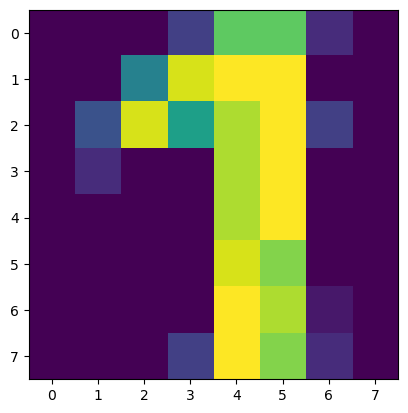

In [127]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[1500])
plt.imshow(digits.data[1500].reshape((8,8)))

**5. [0.1 балла] Примените к матрице `digits.data` сингулярное разложение.**

In [130]:
import time
begin_SVD=time.time()
Ud, Sd, VTd = svd(digits.data, full_matrices=False)
Md = Ud@np.diag(Sd)
total_SVD=time.time()-begin_SVD
print("Затраты времени на SVD равны: ", total_SVD)

Затраты времени на SVD равны:  0.012000560760498047


**6. [0.65 балла] Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).**

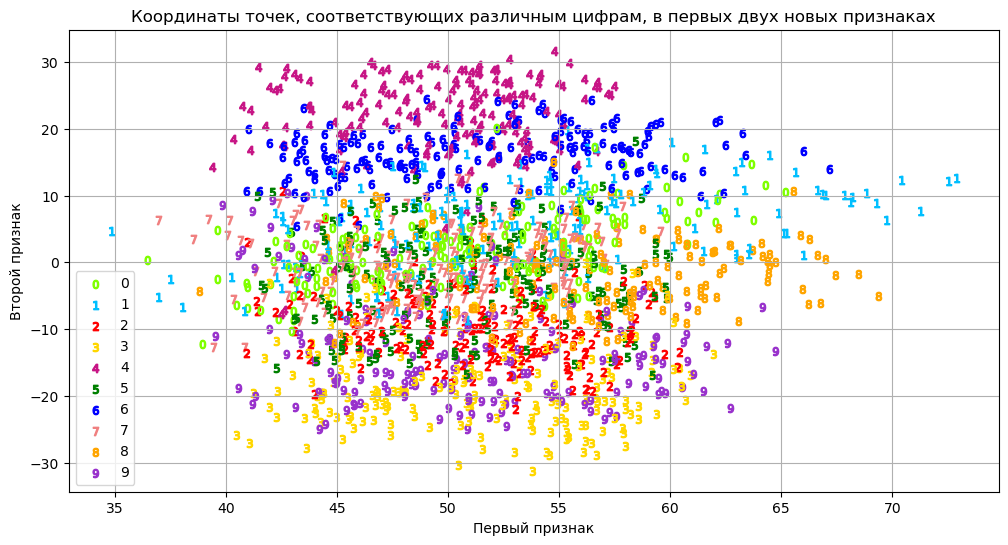

In [131]:
firstd=Md[:,0] #Берем первый столбец матрицы с новыми признаками
secondd = Md[:,1] #Берем второй столбец матрицы с новыми признаками
    
plt.figure(figsize = (12,6))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']
for i in range(len(digits.target)):
    plt.scatter(firstd[i], secondd[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Координаты точек, соответствующих различным цифрам, в первых двух новых признаках')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

**7. [0.25 балла] Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.**

In [133]:
means = []

#Высчитываем средние значения для каждого признака (т.е. среднее арифметическое для каждого столбца)
for i in range(len(digits.data[0])):
    col=digits.data[:,i]
    means.append(sum(col)/len(col))
    
#Создаем матрицу, в которой по столбцам записаны полученные средние значения  
digits_new=np.full((len(digits.data), len(digits.data[0])), means)  

#Вычитаем матрицу средних значений из изначальной матрицы
digits_new=digits.data-digits_new

#Делаем SVD для новой матрицы
Un, Sn, VTn = svd(digits_new, full_matrices=False)

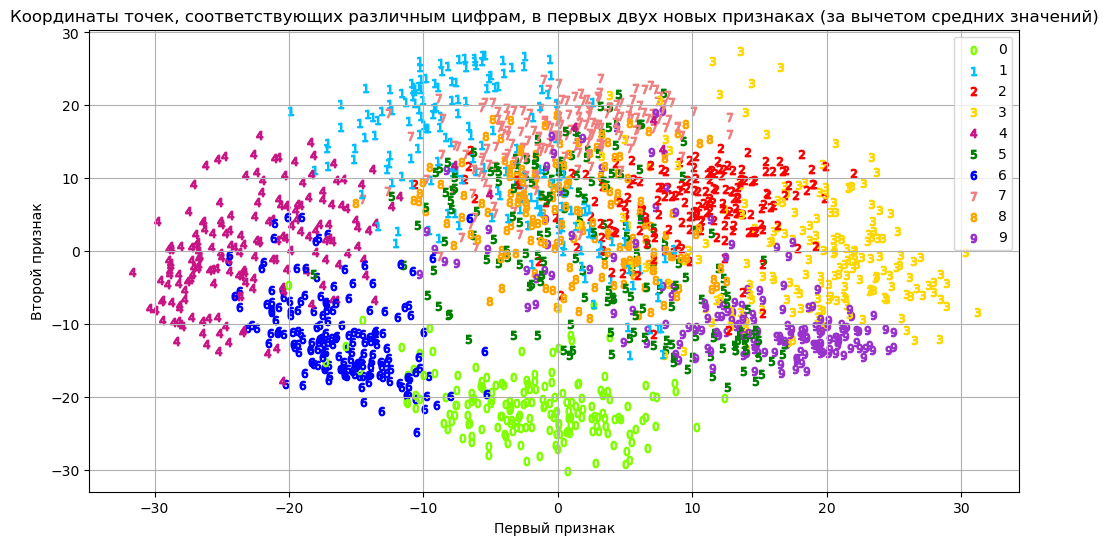

In [134]:
Mn = Un@np.diag(Sn)
firstn=Mn[:,0] #Берем первый столбец новой матрицы с новыми признаками
secondn = Mn[:,1] #Берем второй столбец новой матрицы с новыми признаками
    
plt.figure(figsize = (12,6))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']
for i in range(len(digits.target)):
    plt.scatter(firstn[i], secondn[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])

plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Координаты точек, соответствующих различным цифрам, в первых двух новых признаках (за вычетом средних значений)')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

**8. [0.25 балла] Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?**

### Ответ

В первой визуализации мы проектировали нашу выборку на плоскость первых двух признаков, не производя подсчета и вычитания средних значений из признаков. Можно заметить, что все точки "сдвинуты" от начала координат в положительную полуплоскость. Более того, точки сильно "залазят" друг на друга, они буквально находятся все в одной куче.

Однако в последней визуализации мы произвели центрирование: вычли из каждого признака его среднее значение. Это сдвинуло все точки в начало координат - в частности, теперь график лежит во всех четырех квадрантах, и он даже более-менее симметричен относительно начала координат. Центрирование также нивелировало влияние среднего значения и помогло нам увидеть, насколько и как данные меняются на самом деле. Кроме того, благодаря центрированию проявилась структура данных: теперь многие точки, отвечающие одной и той же цифре, находятся в "своей" области. Иными словами, нам удалось кластеризовать точки из выборки.

Скорее всего, центрирование может быть полезно, если в ходе анализа нам нужно разбить данные по классам (как здесь мы разбили цифры по областям на плоскости), т.к. благодаря ему просматриваются наиболее явные сходства и различия измерений. 

**9. [1 балл] Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).**

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Затраты времени на двумерную кластеризацию через Гауссовы проекции равны:  0.0030007362365722656


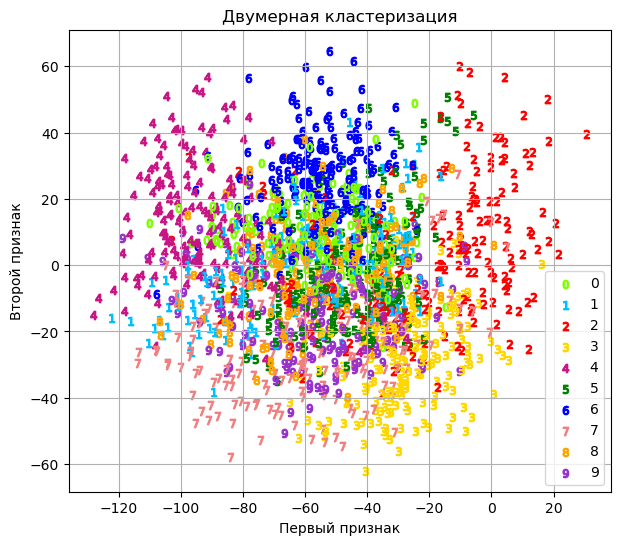

In [135]:
#Двумерная кластеризация

from sklearn.random_projection import GaussianRandomProjection
digits_copy = digits.data.copy()

begin_Gauss1=time.time()
distrib = np.random.RandomState(42)
projector1 = GaussianRandomProjection(n_components=2, random_state=distrib)
result1 = projector1.fit_transform(digits_copy)
total_Gauss1=time.time()-begin_Gauss1
print("Затраты времени на двумерную кластеризацию через Гауссовы проекции равны: ", total_Gauss1)

x1_coord=result1[:, 0]
y1_coord=result1[:, 1]

plt.figure(figsize = (7, 6))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result1)):
    plt.scatter(x1_coord[i], y1_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Двумерная кластеризация')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

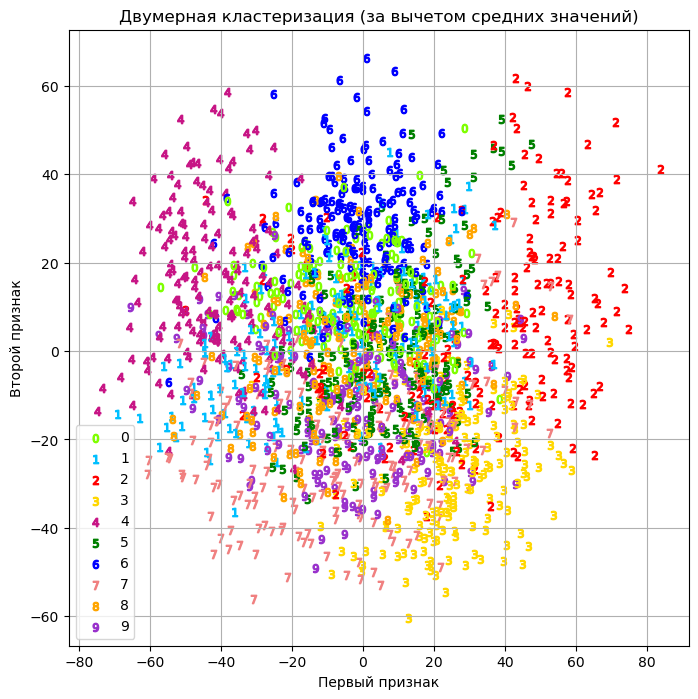

In [137]:
#Двумерная кластеризация (за вычетом средних значений)

x1_mean=sum(result1[:, 0])/len(result1[:, 0])
y1_mean=sum(result1[:, 1])/len(result1[:, 1])

for i in range(len(result1[:, 1])):
    x1_coord[i]-=x1_mean
    y1_coord[i]-=y1_mean

plt.figure(figsize = (8, 8))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result1_mean)):
    plt.scatter(x1_coord[i], y1_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Двумерная кластеризация (за вычетом средних значений)')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

Затраты времени на трехмерную кластеризацию через Гауссовы проекции равны:  0.0029959678649902344


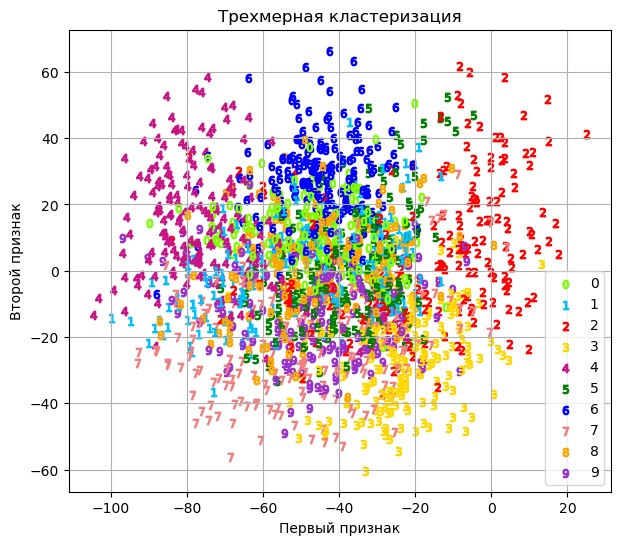

In [138]:
#Трехмерная кластеризация

digits_copy = digits.data.copy()

begin_Gauss2=time.time()
distrib = np.random.RandomState(42)
projector2 = GaussianRandomProjection(n_components=3, random_state=distrib)
result2 = projector2.fit_transform(digits_copy)
total_Gauss2=time.time()-begin_Gauss2
print("Затраты времени на трехмерную кластеризацию через Гауссовы проекции равны: ", total_Gauss2)

x2_coord=result2[:, 0]
y2_coord=result1[:, 1]

plt.figure(figsize = (7, 6))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result2)):
    plt.scatter(x2_coord[i], y2_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Трехмерная кластеризация')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

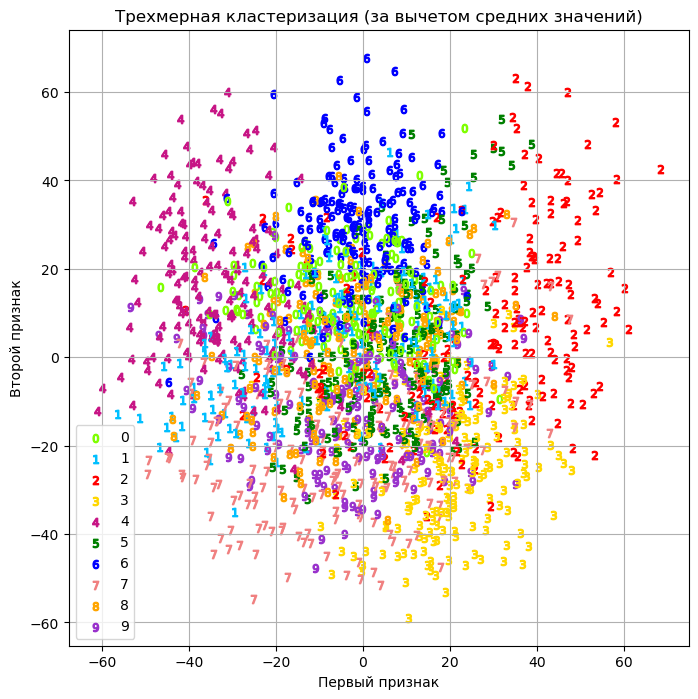

In [139]:
#Трехмерная кластеризация (за вычетом средних значений)

x2_mean=sum(result2[:, 0])/len(result2[:, 0])
y2_mean=sum(result2[:, 1])/len(result2[:, 1])

for i in range(len(result2[:, 1])):
    x2_coord[i]-=x2_mean
    y2_coord[i]-=y2_mean

plt.figure(figsize = (8, 8))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result2_mean)):
    plt.scatter(x2_coord[i], y2_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Трехмерная кластеризация (за вычетом средних значений)')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

Затраты времени на четырехмерную кластеризацию через Гауссовы проекции равны:  0.0030050277709960938


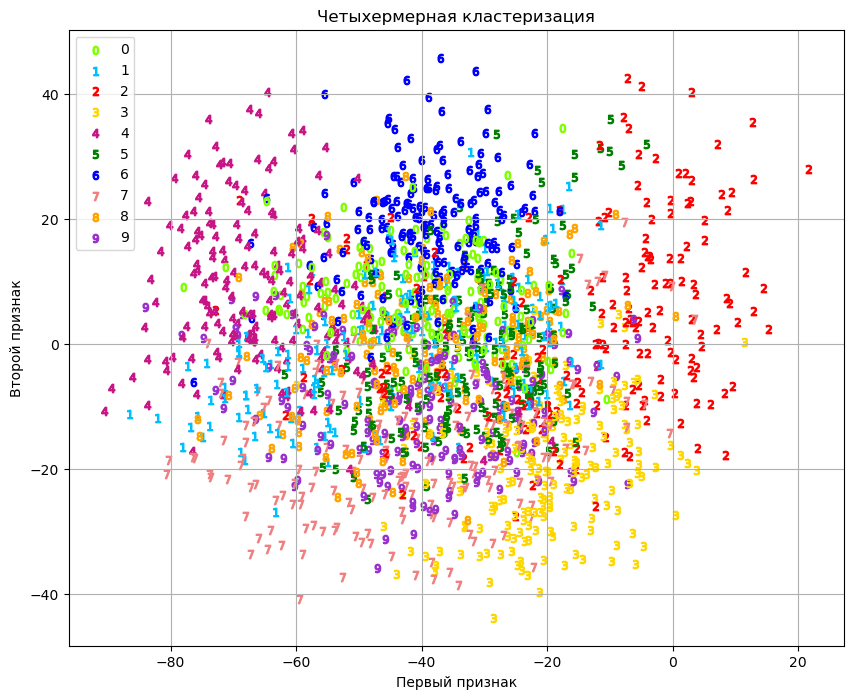

In [99]:
#Четырехмерная кластеризация 

digits_copy = digits.data.copy()

begin_Gauss3=time.time()
distrib = np.random.RandomState(42)
projector3 = GaussianRandomProjection(n_components=4, random_state=distrib)
result3 = projector3.fit_transform(digits_copy)
total_Gauss3=time.time()-begin_Gauss3
print("Затраты времени на четырехмерную кластеризацию через Гауссовы проекции равны: ", total_Gauss3)

x3_coord=result3[:, 0]
y3_coord=result3[:, 1]

plt.figure(figsize = (10, 8))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result3)):
    plt.scatter(x3_coord[i], y3_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Четыхермерная кластеризация')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

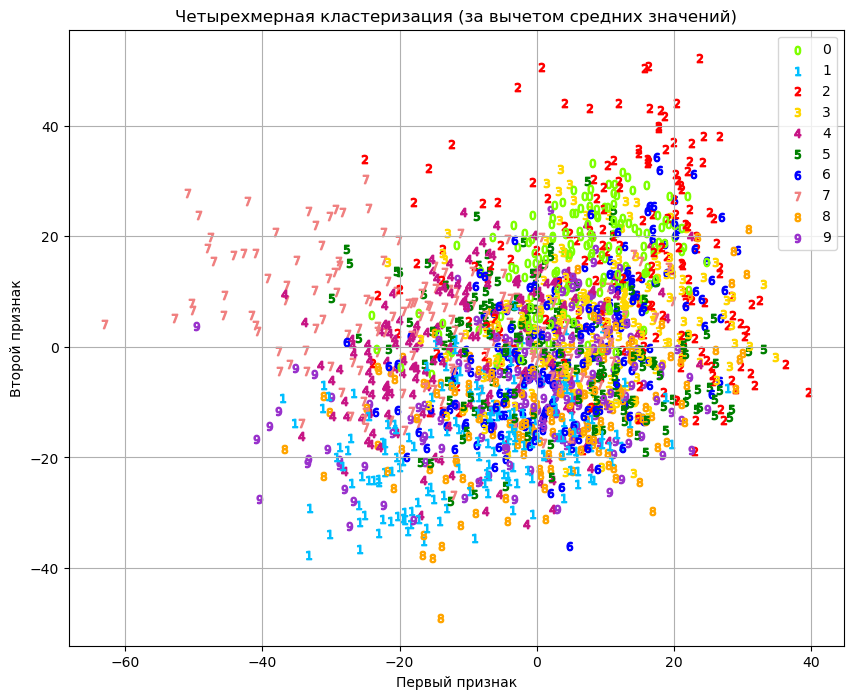

In [100]:
#Трехмерная кластеризация (за вычетом средних значений)

x3_mean=sum(result3[:, 0])/len(result3[:, 0])
y3_mean=sum(result3[:, 1])/len(result3[:, 1])

for i in range(len(result3[:, 1])):
    x3_coord[i]-=x3_mean
    y3_coord[i]-=y3_mean

plt.figure(figsize = (10, 8))    
plt.grid()

colors=['chartreuse', 'deepskyblue', 'red',  'gold', 'mediumvioletred', 'green', 'blue', 'lightcoral', 'orange', 'darkorchid']

for i in range(len(result3_mean)):
    plt.scatter(x3_coord[i], y3_coord[i], marker=r'$' + str(digits.target[i]) + '$', color=colors[digits.target[i]])


plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('Четырехмерная кластеризация (за вычетом средних значений)')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

### Ответ

Сравним два метода понижения размерности - SVD и случайные Гауссовские проекции:

1) Как мы видим, SVD понижает размерность данных при поддержании наибольшей дисперсии среди новых признаков. SVD, особенно вкупе с центрированием, позволяет добиться неплохой кластеризации данных. На визуализациях, где мы применяли SVD, четче просматривается структура данных. Гауссовские же проекции являются случайными, поэтому кластеризация данных с их помощью не удается. Можно заметить, что даже центрирование здесь не помогает как-либо разбить данные на группы.
Кроме того, в случае Гауссовских проекций информация может искажаться, ведь мы домножаем исходную матрицу на случайную матрицу проекции.

2) Судя по нашим измерениям, SVD обычно работает в несколько раз медленнее, чем случайные Гауссовские проекции. Здесь разница может быть не так заметна, потому что мы работаем с очень маленькими объемами данных, но на бОльших объемазх информации отличия во времени работы двух инструментов будут более значительными. Скорее всего, дело в том, что в случае SVD приходится вычислять все 3 матрицы в сингулярном разложении, что относительно долго, а в Гауссовских проекциях мы имеем дело с перемножением 2 матриц.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [140]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

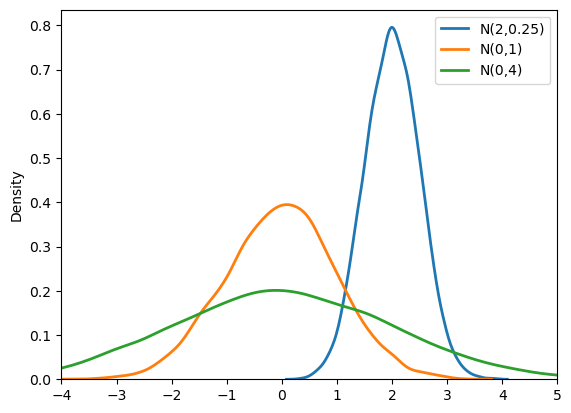

In [141]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<AxesSubplot:>

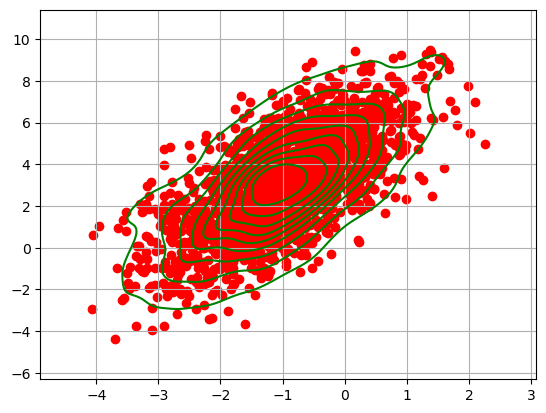

In [142]:
import seaborn as sns
import numpy as np

N = 2000
mean=np.array([-1,3])
cov=np.array([[1,1.5],[1.5,5]])
s = np.random.multivariate_normal(mean, cov, size=N)
plt.grid() 
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0], y=s[:,1], shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

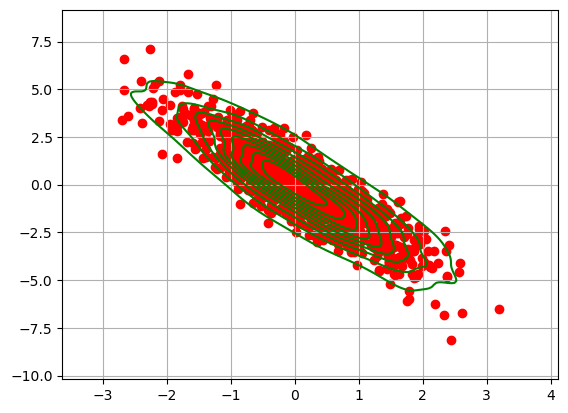

In [149]:
M=1000
mean_m=np.array([0, 0])
cov_m=np.array([[1, -2],[-2, 5]])
X = np.random.multivariate_normal(mean_m, cov_m, size=M)
plt.grid()
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(X[:,0], X[:,1], shade=False, color='g')

**2. [0.25 балла] Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.**

**Замечание**

Во-первых, направления новых признаков - это векторы, записанные по столбцам матрицы $V$ в сингулярном разложении матрицы  $X$.

Во-вторых, здесь я изображу векторы не только для данного, но и для следующего задания - для наглядности.

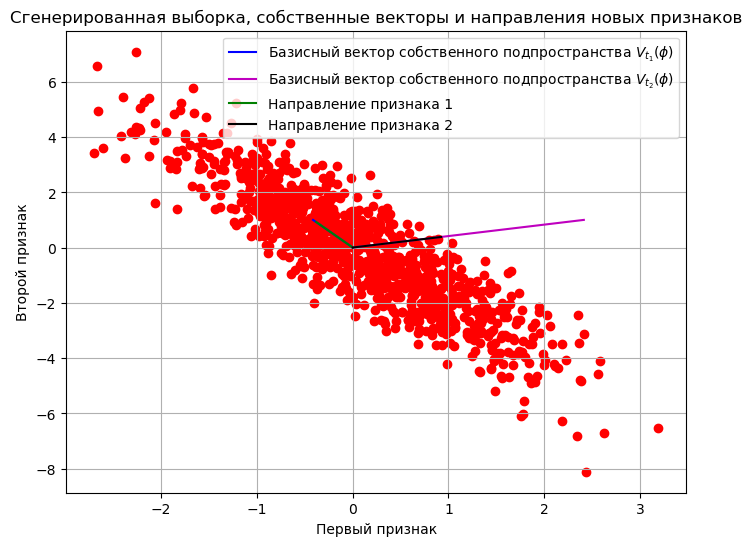

In [150]:
Ux, Sx, VTx = svd(X, full_matrices=False)

plt.figure(figsize = (8,6))    
plt.grid()
plt.scatter(X[:,0], X[:,1], color='red')


#Изобразим базисные вектора собственных подпространств: построим отрезки, соединяющие точку (0, 0) и "концы" данных векторов 
vec1_x=[0, 1-2**(0.5)]
vec_y=[0, 1]
vec2_x=[0, 1+2**(0.5)]

plt.plot(vec1_x, vec_y, color='b', label='Базиcный вектор собственного подпространства $V_{t_1}(\phi)$')
plt.plot(vec2_x, vec_y, color='m', label='Базиcный вектор собственного подпространства $V_{t_2}(\phi)$')


#Изобразим направления новых признаков: построим отрезки, соединяющие точку (0, 0) и "концы" векторов, 
#координаты которых записаны по строкам матрицы V^T
vec3_x = [0, VTx[0][0]]
vec3_y=[0, VTx[0][1]]

vec4_x=[0, VTx[1][0]]
vec4_y=[0, VTx[1][1]]

plt.plot(vec3_x, vec3_y, color='g', label='Направление признака 1')
plt.plot(vec4_x, vec4_y, color='k', label='Направление признака 2')

plt.legend()
plt.title('Сгенерированная выборка, собственные векторы и направления новых признаков')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

**3. [0.5 балла] Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.**

1) Ассоциируем заданную матрицу с самосопряженным линейным оператором $\phi$. Найдем все собственные значения данного линейного оператора, т.е. все корни его характеристического многочлена:
$$ \chi_{\phi}(t) = \begin{vmatrix}
1-t & -2\\
-2 & 5-t
\end{vmatrix}=0$$
$\implies 5-6t+t^2-4=t^2-6t+1=0 \implies D=36-4*1*1=32=(4\sqrt{2})^2 \implies t_1=3+2\sqrt{2}, t_2=3-2\sqrt{2}$


2) Найдем все собственные подпросранства линейного оператора $\phi$:

a) $t_1=3+2\sqrt{2}$:
$$ C=\begin{pmatrix}
-2-2\sqrt{2} & -2\\
-2 & 2-2\sqrt{2}
\end{pmatrix} $$

Найдем ФСР ОСЛУ $Сx=0$: приведем матрицу С у УСВ
$$ C=\begin{pmatrix}
1 & \sqrt{2}-1\\
0 & 0
\end{pmatrix}  \implies \{(1-\sqrt{2}, 1)^T\}$$ - это ФСР ОСЛУ $Cx=0$, т.е. базис собственного подпространства $V_{t_1}(\phi)$

b) $t_2=3-2\sqrt{2}$:

$$ F=\begin{pmatrix}
-2+2\sqrt{2} & -2\\
-2 & 2+2\sqrt{2}
\end{pmatrix} $$

Найдем ФСР ОСЛУ $Fx=0$: приведем матрицу F у УСВ
$$ F=\begin{pmatrix}
1 & -\sqrt{2}-1\\
0 & 0
\end{pmatrix}  \implies \{(1+\sqrt{2}, 1)^T\}$$ - это ФСР ОСЛУ $Fx=0$, т.е. базис собственного подпространства $V_{t_2}(\phi)$


### Ответ

Собственные векторы - базисы полученных подпространств - действительно примерно совпадают с направлениями новых признаков. В различных выборках они либо практически сонаправлены, либо противонаправлены - но все еще коллинеарны.

**Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.**

**4. [0.25 балла] Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.**

**Замечание**

Здесь я изображу векторы из следующего задания - для наглядности.

[0, 2.979081032184376] [0, 5.208173979782096]


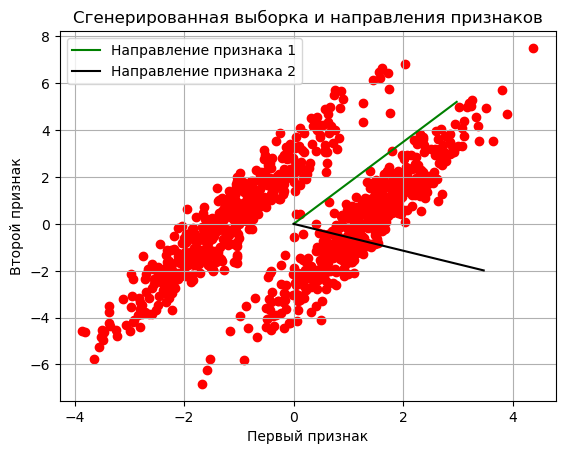

In [103]:
#Построим подходящую выборку, а точнее сгенерируем две выборки, каждая из которых будет соответствовать своему элипсу
#Чтобы добиться параллелности направлений полуосей, будем использовать одну и ту же ковариационную матрицу
Z=500
mean_w1=np.array([1.25, 0])
mean_w2=np.array([-1.25, 0])
cov_w=np.array([[1, 2.1],[2.1, 5]])
W1 = np.random.multivariate_normal(mean_w1, cov_w, size=Z)
W2 = np.random.multivariate_normal(mean_w2, cov_w, size=Z)

#Объединим две полученные выборки в одну и сделаем для итоговой матрицы SVD
W=np.vstack([W1, W2])
Uw, Sw, VTw = svd(W, full_matrices=False)


#Изобразим полученную выборку
plt.grid()
plt.scatter(W1[:,0], W1[:,1], color='red')
plt.scatter(W2[:,0], W2[:,1], color='red')

#Изобразим направления новых признаков: построим отрезки, соединяющие точку (0, 0) и "концы" векторов, 
#координаты которых записаны по строкам матрицы V^T; для наглядности растянем эти векторы
wec1_x = [0, VTw[0][0]*6]
wec1_y=[0, VTw[0][1]*6]
print(wec1_x, wec1_y)

wec2_x=[0, VTw[1][0]*4]
wec2_y=[0, VTw[1][1]*4]

plt.plot(wec1_x, wec1_y, color='g', label='Направление признака 1')
plt.plot(wec2_x, wec2_y, color='k', label='Направление признака 2')

plt.legend()
plt.title('Сгенерированная выборка и направления признаков')
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.show()

**5. [0.1 балла] Сделайте SVD и нарисуйте направления новых признаков.**

Задание выполнено в предыдущей ячейке.

**Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.**

**6. [0.25 балла] Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.**

### Ответ

Заметим, что полуоси рассматриваемых элипсов параллельны друг другу. Поэтому если мы используем каждый признак по отдельности, то это не поможет нам обнаружить структуру. 

Однако мы можем провести прямую через вектор-направление первого признака. Тогда мы поделим всю плоскость надвое: все, что выше-левее прямой (здесь лежит один элипс), и все, что ниже-правее прямой (здесь лежит второй элипс). Тогда у нас получится прямая вида (приблизительно): $y=1,75x$

Если мы возьмем координаты любой точки $А(x_0, y_0)$, принадлежащей одному из этих элипсов, и подставим в данное уравнение, то получим:

- если $y_0 > 1,75x_0$, то это точка из верхнего-левого элипса
- если $y_0 < 1,75x_0$, то это точка из нижнего-правого элипса

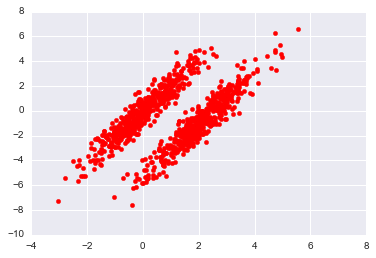

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [205]:
Q=1000
mean_r=np.array([1, 1])
cov_r=np.array([[1, 0],[0, 4]])
R = np.random.multivariate_normal(mean_r, cov_r, size=Q)

**8. [0.2 балла] Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.**

Судя по вектору а, элипс-облако, образуемый точками из данной выборке будет иметь "центр" в точке (1, 1) - из этой точки должны выходить направления его полуосей.

Вне главной диагонали стоят 0, значит, абсциссы и ординаты различных векторов в выборке не должны быть скореллированы. 

На диагонали стоят дисперсии отдельных компонент векторов из генерируемой выборки: на месте $s_{11}$ стоит 1, а на месте $s_{22}$ строит 4. Значит, дисперсия абсцис меньше дисперсии ординат. 

Следовательно, абсциссы "уйдут" от абсциссы "центра - 1 - в среднем на 1 в меньшую и в большую сторону. Ординаты же будут "отстоять" от ординаты "центра" - 1 - в среднем на 4 в большую и меньшую сторону.

Значит, полученный элипс будет более вытянутым в длину, чем в ширину. 

При этом заметим, что данная матрица ковариации уже диагональна. Значит, ее можно легко подвергнуть SVD: $\Sigma = E\Sigma E^T$

При этом мы знаем, что вектора из матрицы $V^T=E^T$ - это векторы-направления признаков рассматриваемой матрицы. Следовательно, в данном случае это векторы $(1, 0)^, (0, 1)^T$, т.е. векторы, параллельные координатным осям.

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


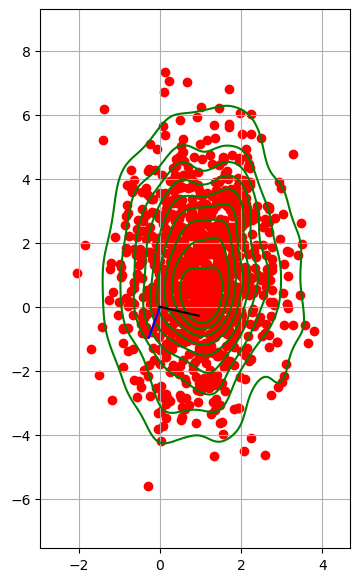

In [206]:
plt.figure(figsize = (4, 7))    
plt.grid()
plt.scatter(R[:,0], R[:,1], color='red')
sns.kdeplot(R[:,0], R[:,1], shade=False, color='g')

Ur, Sr, VTr = svd(R, full_matrices=False)

#Изобразим направления новых признаков: построим отрезки, соединяющие точку (0, 0) и "концы" векторов, 
#координаты которых записаны по строкам матрицы V^T
rec1_x = [0, VTr[0][0]]
rec1_y=[0, VTr[0][1]]

rec2_x=[0, VTr[1][0]]
rec2_y=[0, VTr[1][1]]

plt.plot(rec1_x, rec1_y, color='b', label='Направление признака 1')
plt.plot(rec2_x, rec2_y, color='k', label='Направление признака 2')

**10. [0.4 балла] Сделайте вывод: в чём проблема и как можно её исправить?**

Проблема в том, что "центр" элипса-облака, образуемого точками из сгенерированнолй выборки, находится не в точке (0, 0), а векторы-направления признаков откладываются именно от этой точки.

Решением может быть алгоритм, проделанный нами в задании 7 блока "Визуализация данных с помощью SVD":

1) для каждого признака найти его среднее значение

2) вычесть это среднее значение из каждого признака покоординатно

Полученные точки будут "сдвинуты" в точку (0, 0), т.е. образуемый ими элипс-облако будет иметь "центр" в точке (0, 0), и он будет примерно совпадать с точкой начала векторов-направлений признаков.